### New York City Taxi Fare Prediction

The task is to predict the fare amount (inclusive of tolls) for a taxi ride in New York City given the pickup and dropoff locations. While we can get a basic estimate based on just the distance between the two points, this will result in an RMSE of $5-$8, depending on the model used.Challenge is to do better than this using Machine Learning techniques!

### A project  made by Shruti

<h2>Target</h2>

<ul>
<li><strong>amount</strong> - <code>float</code> dollar amount of the cost of the taxi ride.  This value is only in the training set; this is what you are predicting in the test set and it is required in your submission CSV.</li>
</ul>

### Importing Required Librarires

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Loading Data

In [80]:
m1=pd.read_csv("https://raw.githubusercontent.com/Premalatha-success/Datasets/main/TaxiFare.csv")
m1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [81]:
# Variable for number of models used
count = 0

sc1tr= sc2tr= sc3tr= sc4tr= sc5tr= sc6tr= sc7tr= sc8tr= sc9tr= sc10tr= sc11tr= sc12tr= sc13tr = 0
sc1ts= sc2ts= sc3ts= sc4ts= sc5ts= sc6ts= sc7ts= sc8ts = sc9ts= sc10ts= sc11ts= sc12ts= sc13ts = 0

<p>Notes: </p>
<ol>
<li>The model can be run on both scaled and unscaled data by just commenting/uncommenting train_test_split.</li>
<li>You can exclude a model by just commenting its code and output wont be affected.</li>
</ol>

### Exploratory Data Analysis

### 1) Numerical Analysis

In [4]:
# df.drop('Unnamed: 0', axis= 1, inplace= True)

In [82]:
m1.shape

(50000, 8)

In [83]:
m1.describe(include= 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
unique_id,50000,3597,26:00.0,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,50000.0,NaN,NaN,NaN,11.364171,9.685557,-5.0,6.0,8.5,12.5,200.0
date_time_of_pickup,50000,49555,2011-09-03 01:30:00 UTC,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
longitude_of_pickup,50000.0,NaN,NaN,NaN,-72.509756,10.39386,-75.423848,-73.992062,-73.98184,-73.967148,40.783472
latitude_of_pickup,50000.0,NaN,NaN,NaN,39.933759,6.224857,-74.006893,40.73488,40.752678,40.76736,401.083332
longitude_of_dropoff,50000.0,NaN,NaN,NaN,-72.504616,10.40757,-84.654241,-73.991152,-73.980082,-73.963584,40.851027
latitude_of_dropoff,50000.0,NaN,NaN,NaN,39.926251,6.014737,-74.006377,40.734372,40.753372,40.768167,43.41519
no_of_passenger,50000.0,NaN,NaN,NaN,1.66784,1.289195,0.0,1.0,1.0,2.0,6.0


In [85]:
m1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   unique_id             50000 non-null  object 
 1   amount                50000 non-null  float64
 2   date_time_of_pickup   50000 non-null  object 
 3   longitude_of_pickup   50000 non-null  float64
 4   latitude_of_pickup    50000 non-null  float64
 5   longitude_of_dropoff  50000 non-null  float64
 6   latitude_of_dropoff   50000 non-null  float64
 7   no_of_passenger       50000 non-null  int64  
dtypes: float64(5), int64(1), object(2)
memory usage: 3.1+ MB


In [87]:
m1.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

## 2) Data Visualiztion

### Univariate Analysis

###### Number of passengers

<AxesSubplot:xlabel='no_of_passenger', ylabel='Count'>

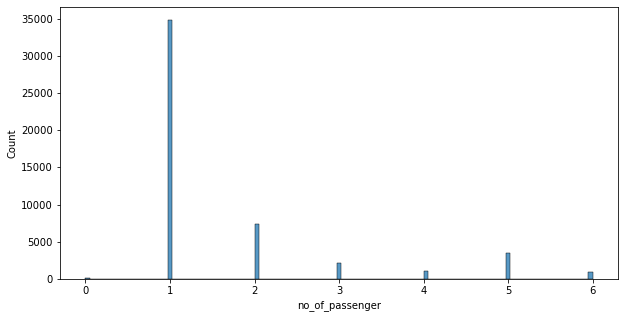

In [88]:
plt.figure(figsize = (10,5))

sns.histplot(x='no_of_passenger', data=m1)

<AxesSubplot:xlabel='no_of_passenger'>

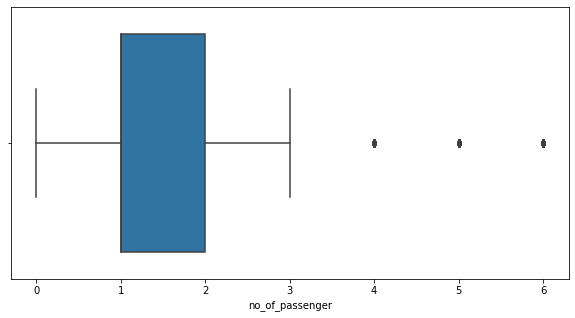

In [89]:
plt.figure(figsize = (10,5))

sns.boxplot( x="no_of_passenger", data=m1)

Mostly number of passengers travelling are either 1 or 2

<AxesSubplot:xlabel='longitude_of_pickup'>

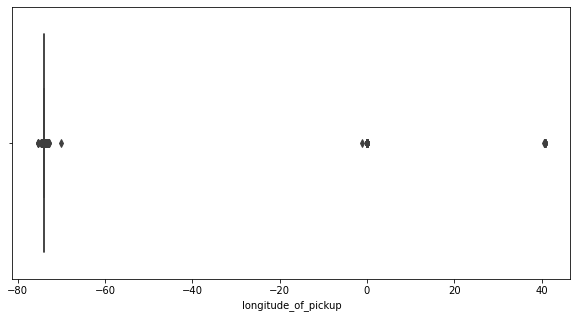

In [90]:
plt.figure(figsize = (10,5))

sns.boxplot( x="longitude_of_pickup", data=m1)

<AxesSubplot:xlabel='latitude_of_pickup'>

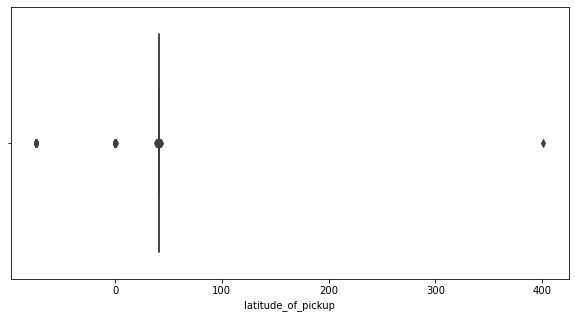

In [92]:
plt.figure(figsize = (10,5))

sns.boxplot( x="latitude_of_pickup", data=m1)

<AxesSubplot:xlabel='longitude_of_dropoff'>

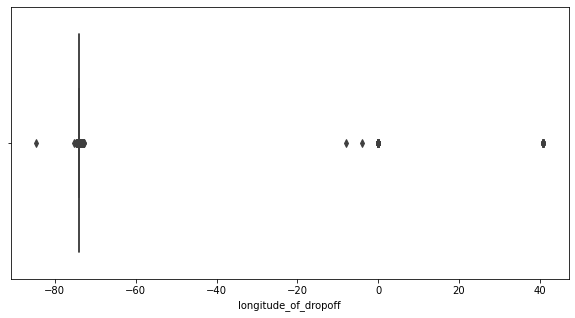

In [91]:
plt.figure(figsize = (10,5))

sns.boxplot( x="longitude_of_dropoff", data=m1)

<AxesSubplot:xlabel='latitude_of_dropoff'>

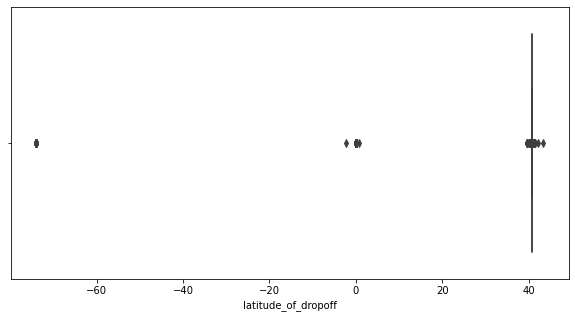

In [93]:
plt.figure(figsize = (10,5))

sns.boxplot( x="latitude_of_dropoff", data=m1)

### Multivariate Analysis

<AxesSubplot:>

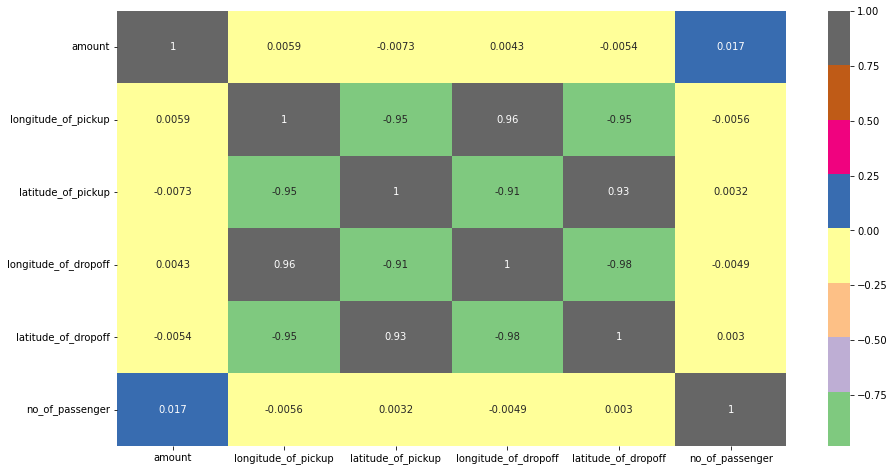

In [96]:
plt.figure(figsize = (15, 8))
corr = m1.corr()
sns.heatmap(corr, annot=True,cmap="Accent")

### Data Cleaning

##### 1) Missing Values

In [97]:
m1.isnull().sum()

unique_id               0
amount                  0
date_time_of_pickup     0
longitude_of_pickup     0
latitude_of_pickup      0
longitude_of_dropoff    0
latitude_of_dropoff     0
no_of_passenger         0
dtype: int64

The dataset has no missing values.

##### 2) Duplicate Values

In [98]:
m1.duplicated().sum()

0

The dataset has no duplicated rows.

In [100]:
lst = list(m1.index)
lst.count(16396)
m1.shape

(50000, 8)

#### Removing values with 0.00000 co-ordinates values

In [101]:
# df.reset_index(inplace = True, drop = True) -> use this line after dropping columns to reset index.
# Code gives error otherwise.

zero_coord = np.where(df['longitude_of_pickup'] == 0.000000)
m1.drop(zero_coord[0], inplace= True)
m1.reset_index(inplace = True, drop = True)

In [102]:
m1.shape

(49045, 8)

In [104]:
m1.shape

(49045, 8)

In [106]:
m1.shape

(49045, 8)

In [108]:

zero_coord = np.where(df['latitude_of_dropoff'] == 0.000000)
m1.drop(zero_coord[0], inplace= True)
m1.reset_index(inplace = True, drop = True)

In [109]:
m1.shape

(49045, 8)

#### Approximating latitudes and longitudes

In [110]:
import copy

def approx_coordinates(m1, column):
    m1 = copy.copy(m1)
    m1 = m1.sort_values([column])
    loop_counter = len(m1[column]) - 1
    changed = 0
    
    for i in range(loop_counter):
        diff = m1[column].loc[i+1] - m1[column].loc[i]
        if(abs(diff) <= 0.000999):
            m1[column].loc[i+1] = m1[column].loc[i]
            changed = changed + 1
    print("Total Changed:", changed)
    
    return m1[column]

In [111]:
m1['longitude_of_pickup']= approx_coordinates(m1, 'longitude_of_pickup')

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\1367403730.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1[column].loc[i+1] = m1[column].loc[i]


Total Changed: 1587


In [29]:
#df['longitude_of_pickup'].value_counts().sort_values(ascending=False)

In [112]:
m1['latitude_of_pickup']= approx_coordinates(m1, 'latitude_of_pickup')

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\1367403730.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1[column].loc[i+1] = m1[column].loc[i]


Total Changed: 1269


In [31]:
#df['latitude_of_pickup'].value_counts().sort_values(ascending=False)

In [32]:
df['longitude_of_dropoff']= approx_coordinates(df, 'longitude_of_dropoff')

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\1164478106.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[column].loc[i+1] = df[column].loc[i]


Total Changed: 1501


In [33]:
#df['longitude_of_dropoff'].value_counts().sort_values(ascending=False)

In [113]:




m1['latitude_of_dropoff']= approx_coordinates(m1, 'latitude_of_dropoff')

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\1367403730.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  m1[column].loc[i+1] = m1[column].loc[i]


Total Changed: 1139


In [35]:
#df['latitude_of_dropoff'].value_counts().sort_values(ascending=False)

##### 3) Removing outliers

In [114]:
import copy

def remove_outliers(m1, column):
    # IQR
    Q1 = np.percentile(m1[column], 25,
                    interpolation = 'midpoint')

    Q3 = np.percentile(m1[column], 75,
                    interpolation = 'midpoint')
    IQR = Q3 - Q1

    print("Old Shape: ", m1.shape)
    
    # Upper bound
    upper = np.where(m1[column] >= (Q3+1.5*IQR))
    m1.drop(upper[0], inplace= True)
    m1.reset_index(inplace = True, drop = True)

     # Lower bound
    lower = np.where(m1[column] <= (Q1-1.5*IQR))
    m1.drop(lower[0], inplace= True)
    m1.reset_index(inplace = True, drop = True)

    print("New Shape: ", m1.shape)
    sns.boxplot(x=column, data=m1)
    
    
    return m1

Removing outliers for ususual locations

Outliers were not removed as the data is getting reduced significantly

Removing less frequent passenger numbers

In [115]:
m1.drop(np.where(m1['no_of_passenger'] == 4)[0], inplace= True)
m1.reset_index(inplace = True, drop = True)

In [116]:
m1.drop(np.where(m1['no_of_passenger'] == 6)[0], inplace= True)
m1.reset_index(inplace = True, drop = True)

In [117]:
m1.shape

(47071, 8)

##### 4) Invalid Data

In [118]:
# There are some negative amount values

negative_amounts = np.where(m1['amount'] <= 0)
m1.drop(negative_amounts[0], inplace= True)
m1.reset_index(inplace = True, drop = True)

In [119]:
m1.shape

(47063, 8)

### 3) Feature Engineering (Extracting time and day)

In [120]:
m1.dtypes

unique_id                object
amount                  float64
date_time_of_pickup      object
longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
dtype: object

date_time_of_pickup column is of object type

In [121]:
m1['date_time_of_pickup'] = pd.to_datetime(m1['date_time_of_pickup'])

In [122]:
m1.dtypes

unique_id                            object
amount                              float64
date_time_of_pickup     datetime64[ns, UTC]
longitude_of_pickup                 float64
latitude_of_pickup                  float64
longitude_of_dropoff                float64
latitude_of_dropoff                 float64
no_of_passenger                       int64
dtype: object

In [123]:
import datetime as dt

year = m1['date_time_of_pickup'].dt.year

In [124]:
year.value_counts().sort_index()

2009    7430
2010    7291
2011    7405
2012    7477
2013    7262
2014    6993
2015    3205
Name: date_time_of_pickup, dtype: int64

#### We have data for year starting from 2009 to 2015

In [125]:
month = m1['date_time_of_pickup'].dt.month

In [126]:
month.value_counts().sort_index()

1     4290
2     4075
3     4361
4     4274
5     4337
6     4236
7     3436
8     3345
9     3589
10    3825
11    3524
12    3771
Name: date_time_of_pickup, dtype: int64

##### We add a new months column in dataset

In [127]:
m1['month'] = month
m1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3


In [128]:
day = m1['date_time_of_pickup'].dt.day

In [129]:
day.value_counts().sort_index()

1     1426
2     1526
3     1485
4     1408
5     1486
6     1585
7     1618
8     1633
9     1574
10    1609
11    1521
12    1642
13    1641
14    1594
15    1617
16    1686
17    1559
18    1582
19    1625
20    1524
21    1621
22    1575
23    1578
24    1500
25    1508
26    1451
27    1440
28    1549
29    1308
30    1360
31     832
Name: date_time_of_pickup, dtype: int64

##### We add a new days column

In [130]:
m1['day'] = day
m1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,15
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,5
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,18
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,9


In [131]:
dayofweek = m1['date_time_of_pickup'].dt.dayofweek

In [132]:
dayofweek.value_counts().sort_index()

0    6262
1    6529
2    6812
3    7041
4    7212
5    7134
6    6073
Name: date_time_of_pickup, dtype: int64

We add day of the week column

In [133]:
m1['dayofweek'] = dayofweek
m1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,15,0
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,5,1
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,18,3
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,9,1


In [134]:
hour = m1['date_time_of_pickup'].dt.hour

In [135]:
hour.value_counts().sort_index()

0     1764
1     1392
2     1027
3      785
4      571
5      476
6      971
7     1789
8     2101
9     2267
10    2147
11    2243
12    2329
13    2342
14    2312
15    2221
16    1926
17    2320
18    2913
19    2928
20    2666
21    2640
22    2617
23    2316
Name: date_time_of_pickup, dtype: int64

##### We will add an hour column

In [136]:
m1['hour'] = hour
m1.head()

,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek,hour
0,26:21.0,4.5,2009-06-15 17:26:21+00:00,-73.844311,40.721319,-73.841610,40.712278,1,6,15,0,17
1,52:16.0,16.9,2010-01-05 16:52:16+00:00,-74.016048,40.711303,-73.979268,40.782004,1,1,5,1,16
2,35:00.0,5.7,2011-08-18 00:35:00+00:00,-73.982738,40.761270,-73.991242,40.750562,2,8,18,3,0
3,30:42.0,7.7,2012-04-21 04:30:42+00:00,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4
4,51:00.0,5.3,2010-03-09 07:51:00+00:00,-73.968095,40.768008,-73.956655,40.783762,1,3,9,1,7


##### We drop unique_id column as it is not required.

In [137]:
m1.drop(['unique_id', 'date_time_of_pickup'], inplace= True, axis= 1)
m1.reset_index(inplace = True, drop = True)


In [138]:
m1.head()

,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek,hour
0,4.5,-73.844311,40.721319,-73.841610,40.712278,1,6,15,0,17
1,16.9,-74.016048,40.711303,-73.979268,40.782004,1,1,5,1,16
2,5.7,-73.982738,40.761270,-73.991242,40.750562,2,8,18,3,0
3,7.7,-73.987130,40.733143,-73.991567,40.758092,1,4,21,5,4
4,5.3,-73.968095,40.768008,-73.956655,40.783762,1,3,9,1,7


### Extracting features and labels

In [139]:
X = m1.drop('amount', axis= 1)
y = m1['amount']

In [140]:
X.dtypes

longitude_of_pickup     float64
latitude_of_pickup      float64
longitude_of_dropoff    float64
latitude_of_dropoff     float64
no_of_passenger           int64
month                     int64
day                       int64
dayofweek                 int64
hour                      int64
dtype: object

### Feature Scaling

In [142]:
from sklearn.preprocessing import StandardScaler 

st_x = StandardScaler()  
X_transformed = st_x.fit_transform(X) 

In [144]:
X_transformed = pd.DataFrame(X_transformed, columns = ['longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger','month','day',
        'dayofweek', 'hour'])

In [145]:
X_transformed.head()

,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger,month,day,dayofweek,hour
0,0.036265,0.002234,0.007426,0.014193,-0.481687,-0.078090,-0.076257,-1.546758,0.542668
1,-0.039282,-0.001446,-0.036858,0.042936,-0.481687,-1.522603,-1.232388,-1.034953,0.388724
2,-0.024629,0.016912,-0.040710,0.029974,0.427171,0.499716,0.270583,-0.011343,-2.074377
3,-0.026561,0.006578,-0.040815,0.033078,-0.481687,-0.655895,0.617422,1.012268,-1.458601
4,-0.018187,0.019388,-0.029584,0.043660,-0.481687,-0.944798,-0.769935,-1.034953,-0.996770


In [146]:
m1.columns

Index(['amount', 'longitude_of_pickup', 'latitude_of_pickup',
       'longitude_of_dropoff', 'latitude_of_dropoff', 'no_of_passenger',
       'month', 'day', 'dayofweek', 'hour'],
      dtype='object')

In [147]:
y_arr = np.array(y).reshape(-1,1)
y_arr.shape
y = st_x.fit_transform(y_arr) 

In [148]:
y_transformed = pd.DataFrame(y, columns= ['amount'])
y_transformed.head()

,amount
0,-0.709578
1,0.577108
2,-0.585060
3,-0.377530
4,-0.626566


### Getting training and testing data

In [149]:
# Value of random state

rdst = 42

In [150]:
# Normal Data

#xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size= 0.3, random_state= rdst)

In [151]:
# Scaled Data

xtrain, xtest, ytrain, ytest = train_test_split(X_transformed, y_transformed, test_size= 0.2, random_state= rdst)

### Model Fitting

##### Here we will use Regression Model's because the target variable is numerical.

#### 1) Decision Tree Regressor

In [152]:
from sklearn.tree import DecisionTreeRegressor

model1 = DecisionTreeRegressor(max_depth=6 , max_features='sqrt', random_state= rdst)
model1.fit(xtrain, ytrain)

DecisionTreeRegressor(max_depth=6, max_features='sqrt', random_state=42)

In [153]:
sc1tr = model1.score(xtrain, ytrain)
sc1tr 

0.5325859757218209

In [154]:
sc1ts = model1.score(xtest, ytest)
sc1ts

0.5482692836687697

In [155]:
#adding values for performance report
count = count + 1

#### 2) SVM

In [156]:
count = count + 1

#### 3) SGD

In [157]:
from sklearn.linear_model import SGDRegressor

model3 = SGDRegressor(random_state= rdst)
model3.fit(xtrain, ytrain)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDRegressor(random_state=42)

In [158]:
sc3tr = model3.score(xtrain, ytrain)
sc3tr

-1.0203330155278151e+21

In [159]:
sc3ts = model3.score(xtest, ytest)
sc3ts

-1.5295567858680444e+20

In [160]:
#adding values for performance report
count = count + 1

#### 4) Bagging Regressor

In [161]:
from sklearn.ensemble import BaggingRegressor

model4 = BaggingRegressor(base_estimator= model1,random_state= rdst)
model4.fit(xtrain, ytrain)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_bagging.py:429: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return column_or_1d(y, warn=True)


BaggingRegressor(base_estimator=DecisionTreeRegressor(max_depth=6,
                                                      max_features='sqrt',
                                                      random_state=42),
                 random_state=42)

In [162]:
sc4tr = model4.score(xtrain, ytrain)
sc4tr

0.6400153962657928

In [163]:
sc4ts = model4.score(xtest, ytest)
sc4ts

0.647544718174234

In [164]:
#adding values for performance report
count = count + 1

#### 5) AdaBoostRegressor

In [165]:
from sklearn.ensemble import AdaBoostRegressor

model5 = AdaBoostRegressor(random_state= rdst)
model5.fit(xtrain, ytrain)

C:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


AdaBoostRegressor(random_state=42)

In [166]:
sc5tr = model5.score(xtrain, ytrain)
sc5tr

-1.7632186666280876

In [167]:
sc5ts = model5.score(xtest, ytest)
sc5ts

-1.918092364431868

In [168]:
#adding values for performance report
count = count + 1

#### 6) GradientBoostingRegressor

In [169]:
from sklearn.ensemble import GradientBoostingRegressor

model6 = GradientBoostingRegressor(random_state= rdst)
model6.fit(xtrain, ytrain)

C:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(random_state=42)

In [170]:
sc6tr = model6.score(xtrain, ytrain)
sc6tr

0.768693641740474

In [171]:
sc6ts = model6.score(xtest, ytest)
sc6ts

0.7676241519883834

In [172]:
#adding values for performance report
count = count + 1

#### 7) RandomForestRegressor

In [173]:
from sklearn.ensemble import RandomForestRegressor

model7 = RandomForestRegressor(n_jobs= 2, random_state= rdst, min_samples_split= 8, min_samples_leaf= 1)
model7.fit(xtrain, ytrain)

C:\Users\HP\AppData\Local\Temp\ipykernel_13016\3103751781.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model7.fit(xtrain, ytrain)


RandomForestRegressor(min_samples_split=8, n_jobs=2, random_state=42)

In [174]:
sc7tr = model7.score(xtrain, ytrain)
sc7tr

0.9325581664096169

In [175]:
sc7ts = model7.score(xtest, ytest)
sc7ts

0.806855569524409

In [176]:
#adding values for performance report
count = count + 1

In [177]:
y_preds = model7

#### 8) Simple Linear Regression

In [178]:
from sklearn.linear_model import LinearRegression

model8 = LinearRegression()
model8.fit(xtrain, ytrain)

LinearRegression()

In [179]:
sc8tr = model8.score(xtrain, ytrain)
sc8tr

0.001774402649542428

In [180]:
sc8ts = model8.score(xtest, ytest)
sc8ts

0.0008748405338205867

In [181]:
#adding values for performance report
count = count + 1

#### 9) GausianRegressor

In [182]:
#adding values for performance report
count = count + 1

#### 10) K nearest neighbour

In [183]:
from sklearn.neighbors import KNeighborsRegressor

model10 = KNeighborsRegressor()
model10.fit(xtrain, ytrain)

KNeighborsRegressor()

In [184]:
sc10tr = model10.score(xtrain, ytrain)
sc10tr

0.24545084161908148

In [185]:
sc10ts = model10.score(xtest, ytest)
sc10ts

-0.15547305865826022

In [186]:
#adding values for performance report
count = count + 1

#### 11) LGBMBoost

In [187]:
from lightgbm import LGBMRegressor

model11 = LGBMRegressor(random_state= rdst)
model11.fit(xtrain, ytrain)

LGBMRegressor(random_state=42)

In [188]:
sc11tr = model11.score(xtrain, ytrain)
sc11tr

0.8089043853367734

In [189]:
sc11ts = model11.score(xtest, ytest)
sc11ts 

0.7880384822742565

In [190]:
#adding values for performance report
count = count + 1

#### 12) CatBoostRegressor

In [191]:
#adding values for performance report
count = count + 1

#### 13) XGBoostRegressor

In [192]:
from xgboost.sklearn import XGBRegressor

model13 = XGBRegressor(random_state= rdst)
model13.fit(xtrain, ytrain)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [193]:
sc13tr = model13.score(xtrain, ytrain)
sc13tr

0.9124608928594679

In [194]:
sc13ts = model13.score(xtest, ytest)
sc13ts 

0.8049045508684342

In [195]:
#adding values for performance report
count = count + 1

### Performance of Algorithms

In [196]:
mnumber = list()
mname = list()
trains = list()
tests = list()

In [197]:
mnumber.extend(np.arange(1,count+1))

mname.extend(["DecisionTreeRegressor","SVM","SGDRegressor","BaggingRegressor","AdaBoostRegressor","GradientBoostingRegressor",
                 "RandomForestRegressor","SimpleLinearRegression","GausianRegressor","K nearest neighbour","LGBMBoost",
                 "CatBoostRegressor","XGBRegressor"])

trains.extend([sc1tr,sc2tr,sc3tr,sc4tr,sc5tr,sc6tr,sc7tr,sc8tr,sc9tr,sc10tr,sc11tr,sc12tr,sc13tr])

tests.extend([sc1ts,sc2ts,sc3ts,sc4ts,sc5ts,sc6ts,sc7ts,sc8ts,sc9ts,sc10ts,sc11ts,sc12ts,sc13ts])

In [198]:
# Rounding percentages to two decimals and checking if model was executed

def myfunc(x):
    x = x * 100
    return format(x,".2f")

def executed(x):
    if x == '0.00':
        x = 'Not Executed'
    return x

In [199]:
trains = list(map(myfunc, trains))

In [200]:
trains = list(map(executed, trains))

In [201]:
tests = list(map(myfunc, tests))

In [202]:
tests = list(map(executed, tests))

In [143]:
results_dict = {"Model No.": mnumber, "Model name": mname,
               "Training Accuracy": trains, "Testing Accuracy": tests}

In [144]:
perf = pd.DataFrame(results_dict)
perf

,Model No.,Model name,Training Accuracy,Testing Accuracy
0,1,DecisionTreeRegressor,60.28,57.86
1,2,SVM,Not Executed,Not Executed
2,3,SGDRegressor,-438876770370259651657728.00,-388649030645497173377024.00
3,4,BaggingRegressor,65.23,63.36
4,5,AdaBoostRegressor,-222.72,-233.03
5,6,GradientBoostingRegressor,77.27,72.90
6,7,RandomForestRegressor,93.38,78.35
7,8,SimpleLinearRegression,0.25,0.26
8,9,GausianRegressor,Not Executed,Not Executed
9,10,K nearest neighbour,24.07,-12.59
